## Foundations: Split data into train, validation, and test set

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will split the data into train, validation, and test set in preparation for fitting a basic model in the next section.

### Read in Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

titanic = pd.read_csv('../input/titanic-cleaned/titanic_cleaned.csv')
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


Vizualization

In [2]:
import plotly.express as px
feat = ["Pclass", "Sex", "Age", "Fare", "Family_cnt", "Cabin_ind"]
print (feat)
fig = px.scatter_matrix(
    titanic,
    dimensions=feat,
    color="Survived"
)

fig.update_traces(diagonal_visible=False)
fig.show()


['Pclass', 'Sex', 'Age', 'Fare', 'Family_cnt', 'Cabin_ind']


PCA

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

X = titanic[["Pclass", "Sex", "Age", "Fare", "Family_cnt", "Cabin_ind"]]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=titanic['Survived'])
fig.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

X = titanic[["Pclass", "Sex", "Age", "Fare", "Family_cnt", "Cabin_ind"]]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=titanic['Survived'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

### Split into train, validation, and test set
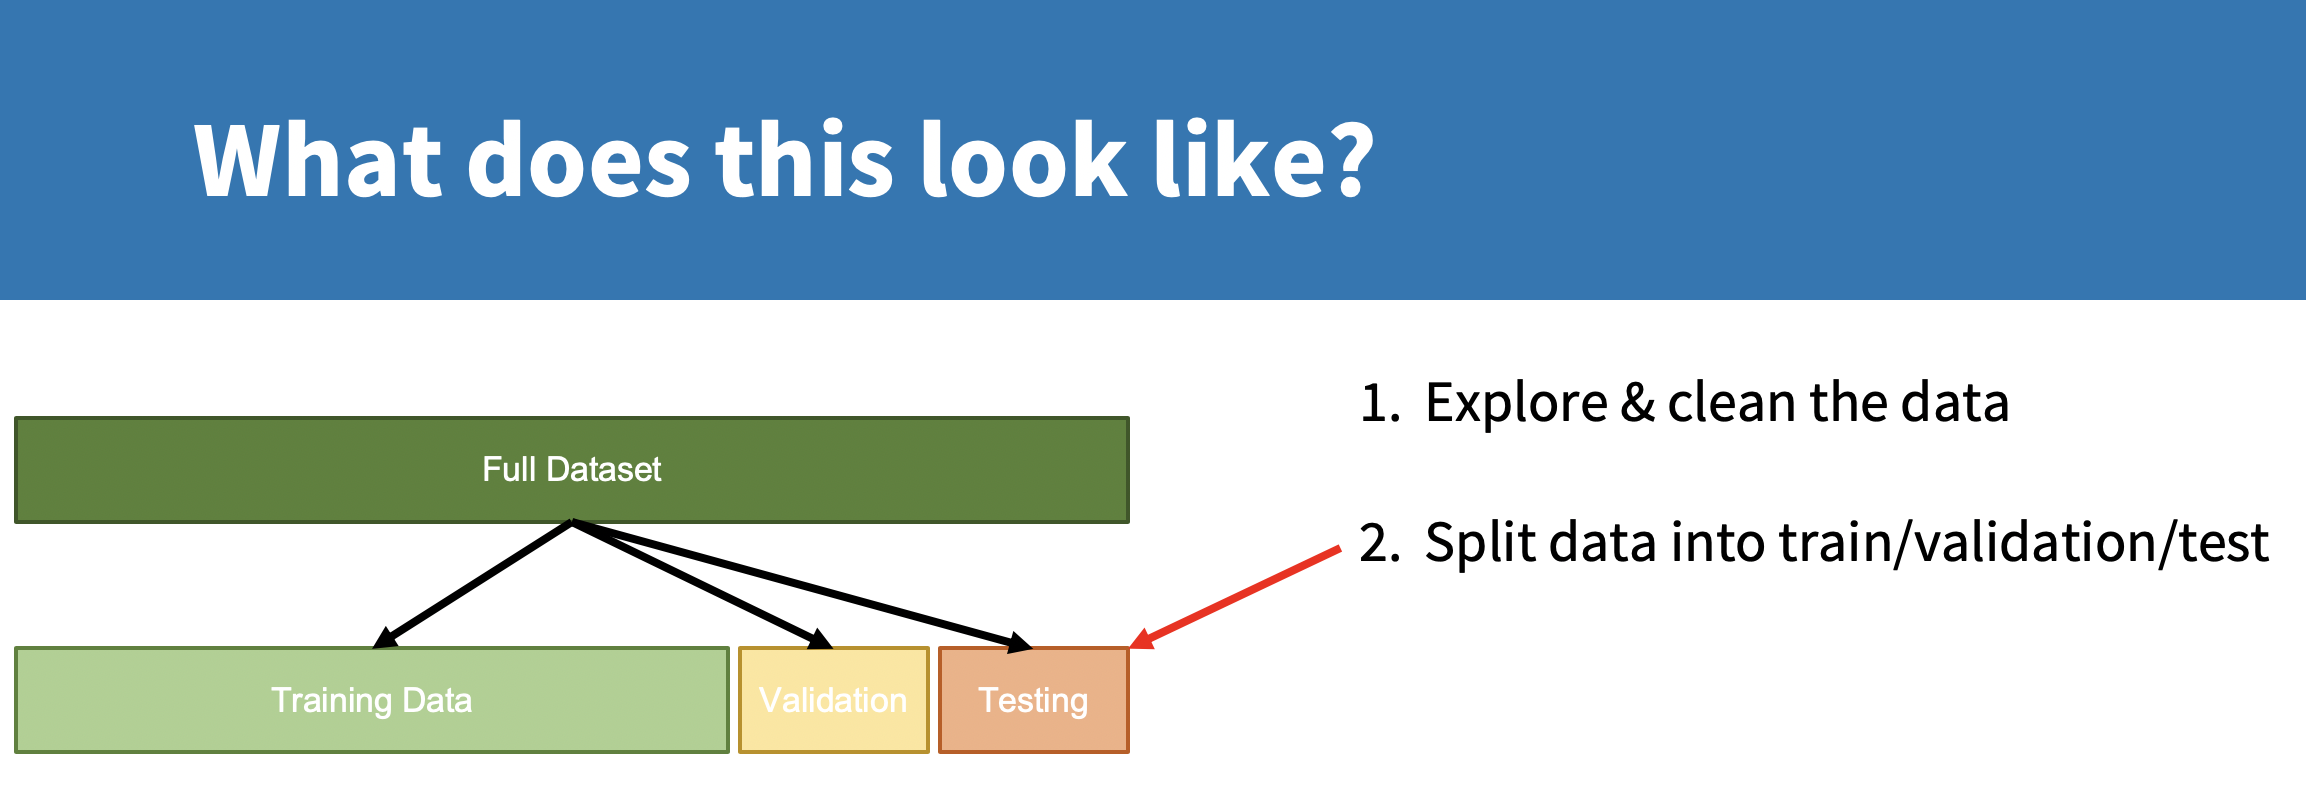


In [ ]:
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

### Write out all data

In [ ]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)